<a href="https://colab.research.google.com/github/ksolaiman/MMIR-SQL-GCN/blob/master/pr_curve_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2025 run

# Define color families for each retrieval task
task_color_families = {
    'text':  ['darkorange', 'navy', 'darkgreen', 'black'],
    'image': ['orange', 'blue', 'green', 'dimgray'],
    'video': ['saddlebrown', 'darkolivegreen', 'seagreen', 'forestgreen'],
    'all':   ['black', 'dimgray', 'gray', 'slategray']
}

def get_colors(target_modality, num_models):
    """
    Return a list of colors for the given task,
    adjusted to the number of models to plot.
    """
    base_colors = task_color_families.get(target_modality, ['black'])
    if len(base_colors) >= num_models:
        return base_colors[:num_models]
    else:
        # Repeat colors if not enough
        repeats = (num_models // len(base_colors)) + 1
        return (base_colors * repeats)[:num_models]

# usage
num_models = 2
colors = get_colors('text', num_models)
print(colors)
for model_idx in range(num_models):
    color = colors[model_idx]

['darkorange', 'navy']


In [ ]:
# 2025 run

import os
from datetime import datetime

def save_pr_curve_plot(query, target, figure=None, models="EARS+FemmIR", outdir='graphs/pr_curves', add_date=True, date_format="%Y-%m-%d"):
    """
    Save the current matplotlib plot to PDF and PNG in structured folders.

    Parameters:
    - query: str, query modality (e.g., 'image')
    - target: str, target modality (e.g., 'video')
    - figure: matplotlib.pyplot.plot object, optional
    - models: str, model names (e.g., 'EARS', 'FemmIR')
    - outdir: str, base output folder is 'graphs/pr_curves'
    - add_date: bool, whether to append current date to filename
    - date_format: str, date format (default: YYYY-MM-DD)
    """
    # Ensure output folders exist
    pdf_dir = os.path.join(outdir, 'pdf')
    png_dir = os.path.join(outdir, 'png')
    os.makedirs(pdf_dir, exist_ok=True)
    os.makedirs(png_dir, exist_ok=True)

    # Optional date stamp
    date_suffix = ''
    if add_date:
        today = datetime.now().strftime(date_format)
        date_suffix = f"_{today}"

    # Create filename
    base_name = f"{query}Q_{target}T_{models}_prcurve{date_suffix}"

    # Save both formats
    plt.savefig(os.path.join(pdf_dir, f"{base_name}.pdf"), bbox_inches='tight')
    plt.savefig(os.path.join(png_dir, f"{base_name}.png"), dpi=300, bbox_inches='tight')


# usage
figure = plt.figure()
save_pr_curve_plot('image', 'video', figure, 'EARS')
save_pr_curve_plot('video', 'image', figure, 'EARS+FemmIR', add_date=True)



<Figure size 640x480 with 0 Axes>

image image
image video


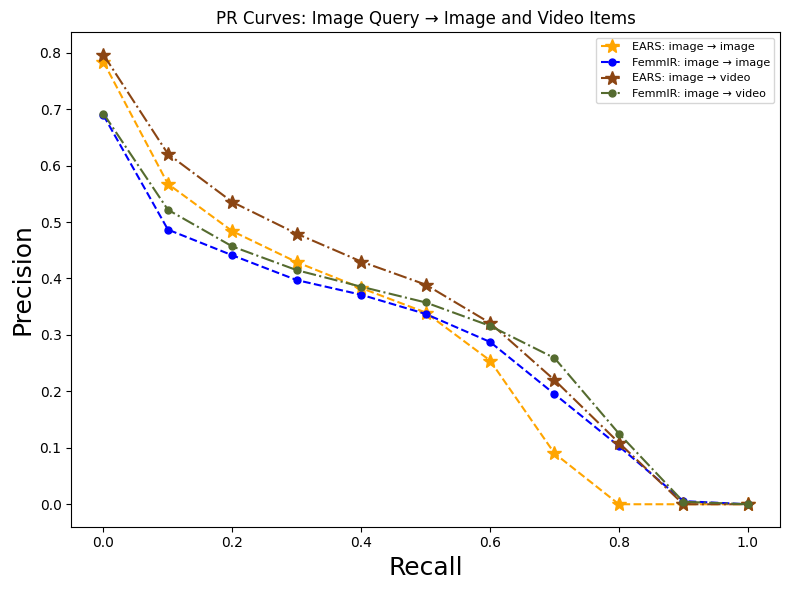

video image
video video


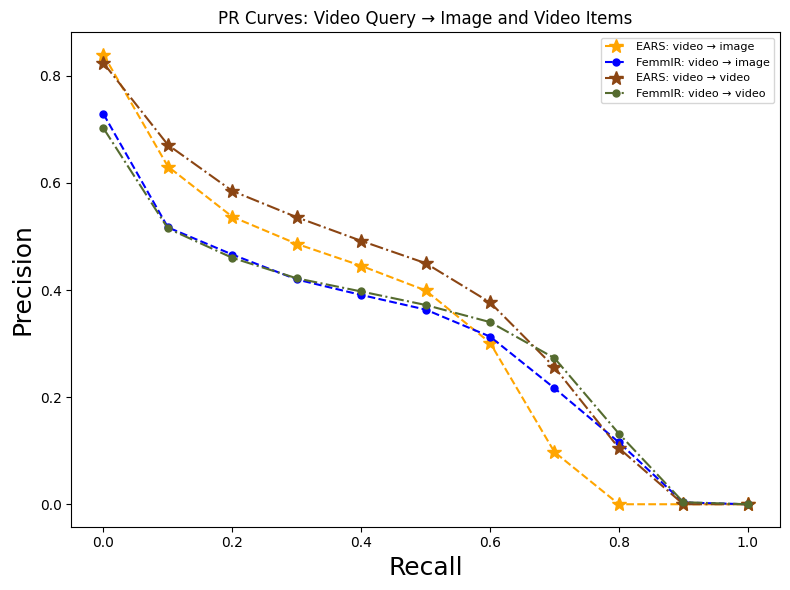

text image


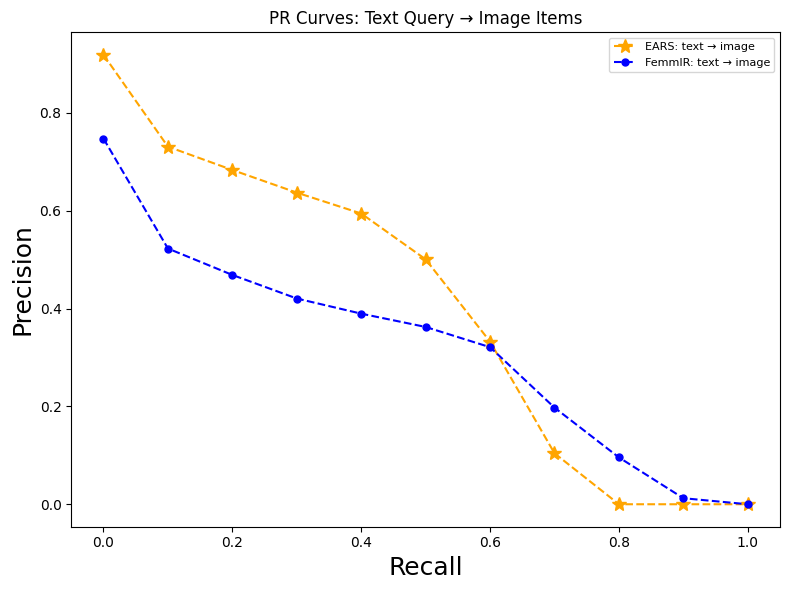

image image


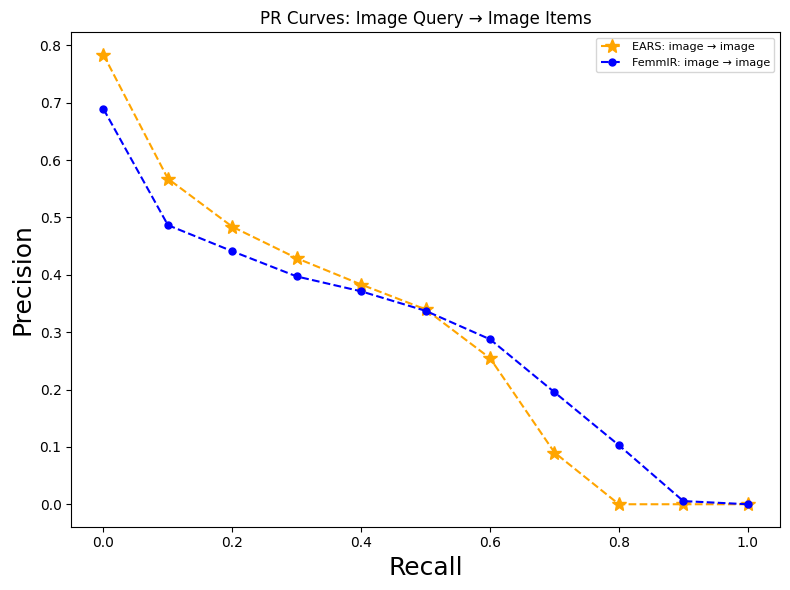

image text
image image


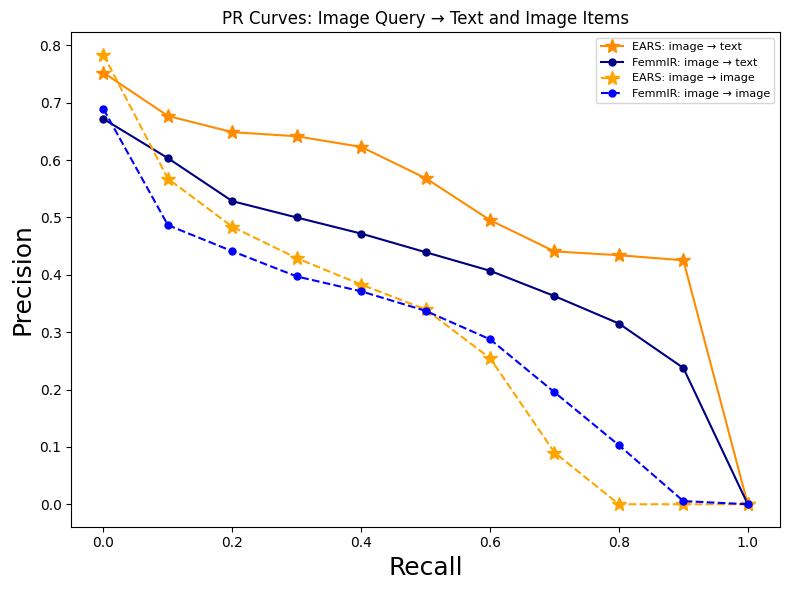

In [ ]:
# 2025 run
# graph comapring ears vs femmir
import pickle
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

# clr = [['r', 'g'],
#        ['c', 'm'],
#        ['b', 'y'],
#        ['b', 'y']]

marker = ['*','.']                # how many models
#, '-', '--', '.-',''
lbl = ['EARS', 'FemmIR']

names = ['text', 'video', 'image', 'all']
noofobj= ['145', '539', '1144', '1828']
line_styles = ['-', '--', '-.', ':']

# lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']
#
# multilbl = [['EARS: img --> txt', 'FemmIR: img --> txt'],
#             ['EARS: img --> img', 'FemmIR: img --> img'],
#             ['EARS: img --> vid', 'FemmIR: img --> vid'],
#             ['EARS: img --> all', 'FemmIR: img --> all']]

def show_compare(name1, name2, plotno=0, simgnn_model_folder=None):
        print(name1, name2)

        # get color family for target/item modality; 2nd param is #models
        colors = get_colors(name2, 2)

        name1_idx = noofobj[names.index(name1)]
        name2_idx = noofobj[names.index(name2)]

        model_name = "EARS/"
        model_version = "main-11-point/"
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(
                recall, precision,
                marker[0]+line_styles[plotno],
                color=colors[0],
                markevery=1, markersize=10,
                label=f'EARS: {name1} → {name2}'
              ) #

        model_name = "simgnn/"
        model_version = simgnn_model_folder
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(
                recall, precision,
                marker[1]+line_styles[plotno],
                color=colors[1],
                markevery=1, markersize=10,
                label=f'FemmIR: {name1} → {name2}'
              ) #

        # naming the x-axis
        plt.xlabel('Recall', fontsize=18)
        # naming the y-axis
        plt.ylabel('Precision', fontsize=18)
        # plot title
        # plt.title('My bar chart!')
        plt.legend(prop={'size': 8})


def compare_modalities(query='image', split=True, targets=None, simgnn_model_folder=None, figSave=False):
    """
    Generalized function to plot PR curves for any query modality against specified targets.

    Parameters:
    - query: str, the query modality ('image' or 'video')
    - split: bool, whether to show separate figures (True) or a combined plot (False)
    - targets: list of target modalities to compare against. Defaults to ['image', 'video']
    """
    if targets is None:
        targets = ['image', 'video']

    # Mapping for plot titles
    title_map = {
        'text': 'Text',
        'image': 'Image',
        'video': 'Video',
        'all': 'All'
    }

    setting_map = {
        'text': 0,
        'image': 1,
        'video': 2,
        'all': 3
    }

    if simgnn_model_folder is None:
        graph_save_dir= "graphs/pr_curves"
        simgnn_model_folder = "sim-as-prediction" # Use the model whose result is in arXiv paper by default, later may change
    else:
        graph_save_dir="simgnn/" + simgnn_model_folder + "/pr_curves"

    if split:
        for idx, target in enumerate(targets):
            plt.figure(figsize=(8, 6))
            show_compare(query, target, setting_map[target], simgnn_model_folder)
            plt.title(f'PR Curve: {query.capitalize()} Query → {title_map.get(target, target.capitalize())} Items')
            plt.tight_layout()
            if figSave:
              save_pr_curve_plot(query, target, plt, 'EARS+FemmIR', outdir=graph_save_dir, add_date=True)
            plt.show()
    else:
        plt.figure(figsize=(8, 6))
        for idx, target in enumerate(targets):
            show_compare(query, target, setting_map[target], simgnn_model_folder)
        target_labels = ' and '.join([title_map.get(t, t.capitalize()) for t in targets])
        plt.title(f'PR Curves: {query.capitalize()} Query → {target_labels} Items')
        plt.tight_layout()
        if figSave:
              save_pr_curve_plot(query, '('+'+'.join(targets)+')', plt, 'EARS+FemmIR', outdir=graph_save_dir, add_date=True)
        plt.show()

    # this was an attempt to write a function that would take list in query modalities too
    # but figured out no need, as two curves (models) for one query -> item is already crowded
    # else:  # if split is false
    #     plt.figure(figsize=(8, 6))

    #     if isinstance(query, list):
    #         # If query is a list, plot each query->target pair
    #         for qidx, q in enumerate(query):
    #             show_compare(q, targets[qidx], setting_map[targets[qidx]], simgnn_model_folder)
    #     else:
    #       # Loop over all targets
    #       for target in targets:
    #           show_compare(query, target, setting_map[target], simgnn_model_folder)

    #     # Make the combined title
    #     if isinstance(query, list):
    #         mini_titles = list()
    #         for qidx, q in enumerate(query):
    #             mini_titles.append(f'{title_map.get(q, q.capitalize())} Query → {title_map.get(targets[qidx], targets[qidx].capitalize())} Items')
    #         miniLabel = ' , '.join([mt for mt in mini_titles])
    #         plt.title(f'PR Curves: {miniLabel}')
    #     else:
    #         target_labels = ' and '.join([title_map.get(t, t.capitalize()) for t in targets])
    #         plt.title(f'PR Curves: {query.capitalize()} Query → {target_labels} Items')
    #     plt.tight_layout()

    #     if figSave:
    #         save_name = (
    #             '(' + '+'.join(query) + ')' if isinstance(query, list) else query
    #         ) + '(' + '+'.join(targets) + ')'
    #         save_pr_curve_plot(save_name, 'EARS+FemmIR', plt, outdir=graph_save_dir, add_date=True)

    #     plt.show()


# the following line would just save the figures in graphs/pr_curve folder
# ran with "sim-as-prediction" results, so no good anymore
# compare_modalities(query='image', split=False)

smf = "sim-as-prediction"

# queries without text modality
compare_modalities(query='image', split=False, simgnn_model_folder = smf, figSave=False)
compare_modalities(query='video', split=False, simgnn_model_folder = smf, figSave=False)

# queries with text modality
compare_modalities(query='text', split=False, targets= ['image'], simgnn_model_folder = smf, figSave=False)
compare_modalities(query='image', split=False, targets= ['image'], simgnn_model_folder = smf, figSave=False)

# for comparing against the reference model in the cell after this, confirmed same with "sim-as-prediction"
# but now deleted (these were saved under oct15_2022)
compare_modalities(query='image', split=False, targets= ['text', 'image'], simgnn_model_folder = smf, figSave=False)


# compare_modalities(query=['video', 'image'], split=False, targets= ['image', 'image'], simgnn_model_folder = smf, figSave=False)

In [ ]:
# to save colab working files/repository to local

from google.colab import files
files.download("/content/simgnn.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

145 145
11
145 539
11
145 1144
11
145 1828
11


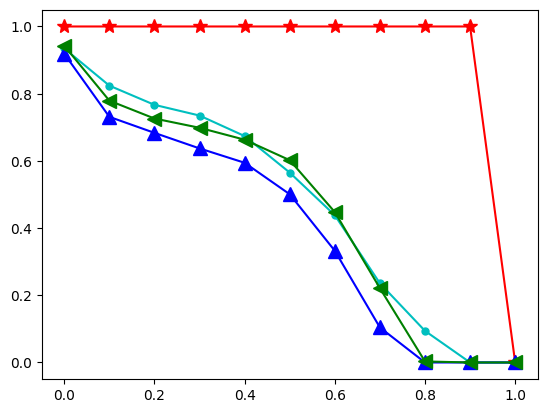

In [87]:
# only EARS curves

import pickle
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

clr = ['r', 'c', 'b', 'g']
marker = ['*','.','^','<']
names = ['145', '539', '1144', '1828']
lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']

for idx2, name1 in enumerate(names[0:1]):#[:-1]:
    for idx, name2 in enumerate(names[0:4]):
        print(name1, name2)

        model_name = "EARS/"
        model_version = "main-11-point/"
        with open(model_name + model_version + "/" + name1+"-"+name2+"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
            print(len(precision))
        with open(model_name + model_version + "/" + name1+"-"+name2+"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)

        plt.plot(recall, precision, marker[idx]+'-'+clr[idx], markevery=1, markersize=10, label=lbl[idx])